In [1]:
# Libraries
import os 
import numpy as np
import pandas as pd
import graph_tool.all as gt
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Path
CWD = os.getcwd()

# Problem to address

⍺βƔ is a prominent law firm based in Europe, which counts circa 1,000 associates and 200 partner attorneys and operates in the business segment. Over the past five years, ⍺βƔ has been coping with a high number of voluntary mobility events that were mainly due to competitive offers from rival firms. In a fraction of the cases, employees were retained by matching rivals' offers. Executives have started to consider churn a structural feature of the sector – hence, they have planned to create some policies aiming at **minimizing the negative impact of mobility and ensuring consistency across mobility cases**. Use this dataset containing relational and attributive data on attorneys (companion documents included in the folder), to address the below-displayed questions:

* what are the key decision drivers that executives should keep in mind when it comes retaining a lawyer with a job offer from a rival?
* which are the lawyers that should be retained by matching any offer coming from rivals? Why?


## Spatial cluster

- **Pros and cons?**

<img src="https://eoimages.gsfc.nasa.gov/images/imagerecords/87000/87551/iss045e032242_lrg.jpg" width="70%">

## Mobility

- **Pros and cons?**

<img src="http://trilbee.com/wp-content/uploads/2015/10/the-intern-3.png" width=75%>

# Human capital

**Human capital loss: talented individuals are hard to replace!**

Attributive data (see attributive_data.csv) comprise the following variables:

* org_tnr: years spent at ⍺βƔ (from internal archive; z-scores reported)
* prf: individual performance (based on supervisor ratings). The measure, expressed as a z-score, takes into account both effectiveness and efficiency
* ocb: individual [organizational citizenship behavior](https://en.wikipedia.org/wiki/Organizational_citizenship_behavior) (OCB) (based on supervisor ratings). The measure, expressed as a z-score, comes from the prior literature on OCB
* ldr: individual ability/capacity to project his/her view and to guide others' behavior over and beyond roles and organizational/reporting structures (based on supervisor ratings). The measure, expressed as a z-score, comes from the prior literature on charismatic leadership

In [2]:
# load
df = pd.read_csv(os.path.join(CWD, 'attributive_data.csv'))
# describe
df.iloc[:, 1:].describe()

org_tnr         prf         ocb         ldr
count  817.000000  817.000000  817.000000  817.000000
mean     0.033393   -0.071239    0.022865   -0.052393
std      1.051196    1.032762    0.982801    1.009636
min     -3.024540   -2.803496   -3.216789   -2.938642
25%     -0.694812   -0.748736   -0.648873   -0.729501
50%      0.049007   -0.008502    0.011463   -0.058012
75%      0.721967    0.642422    0.703938    0.627039
max      3.358496    3.283000    3.240857    2.925739

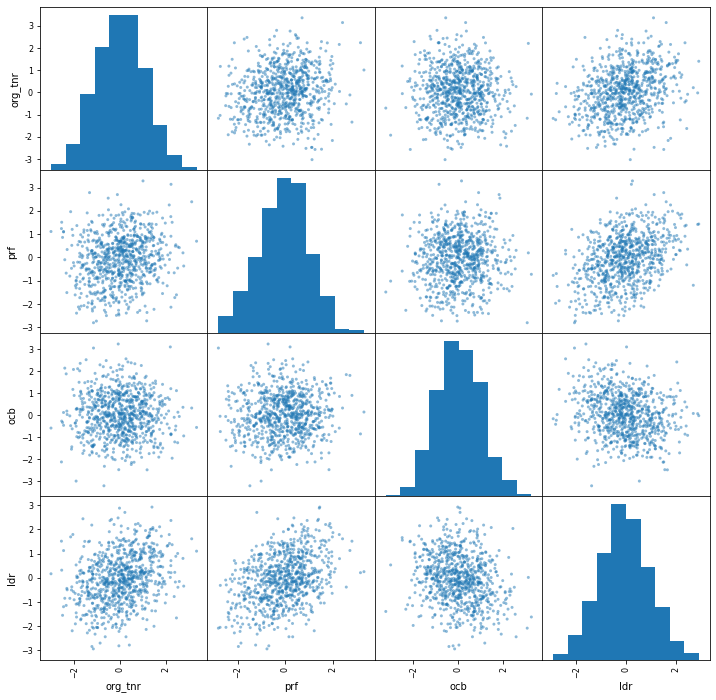

In [3]:
# pairplot
pd.plotting.scatter_matrix(df.iloc[:, 1:], figsize=(12,12), range_padding=0.15)
plt.show()

In [4]:
# stars
stars = df[(df.prf>=df.prf.describe()[6]) & 
           (df.ocb>=df.ocb.describe()[6]) & 
           (df.ldr>=df.ldr.describe()[6])].id
# describe stars
df.iloc[stars.index, 1:].describe()

org_tnr        prf        ocb        ldr
count  17.000000  17.000000  17.000000  17.000000
mean    0.094859   1.442105   1.244302   1.218810
std     1.189913   0.674956   0.435925   0.486873
min    -2.065508   0.661271   0.827021   0.627039
25%    -0.485845   0.940343   0.899817   0.793473
50%     0.044163   1.208324   1.162528   1.073368
75%     1.124855   1.898929   1.461405   1.648091
max     1.867108   2.780879   2.422401   2.080051

# Social capital

**Social capital loss: inter-personal, informal inter-personnel interactions are key to promote organizational effectiveness**. This is particularly true in the context of professional service firms, wherein 'tasks' always entail some level of uncertainty, and, therefore, are impossible to standardize or to fully describe in organizational procedures. In such a scenario, the informal network that emerges out the spontaneous interactions among employees is a coordination mechanism that complements formal procedures, roles, and organizational/reporting structures. Every mobility event stresses the informal network and, as a result, negatively affects outcomes such as:
- group-level information processing, which depends on network connectivity
- inter-personal knowledge exchange, which largely flows through strong ties (think about a mentoring relationship)
- leadership and inter-personal/group-level coordination

Relational data (.gml format):

* knw_exc.gml: a one mode-network expressing who is exchanging knowledge with whom. By knowledge, the survey means mental models and schemas that help individuals to carry out projects and to navigate the complexity of the organization they belong to. Note these mental models and schemas are informal, that is, not codified in any organizational procedure


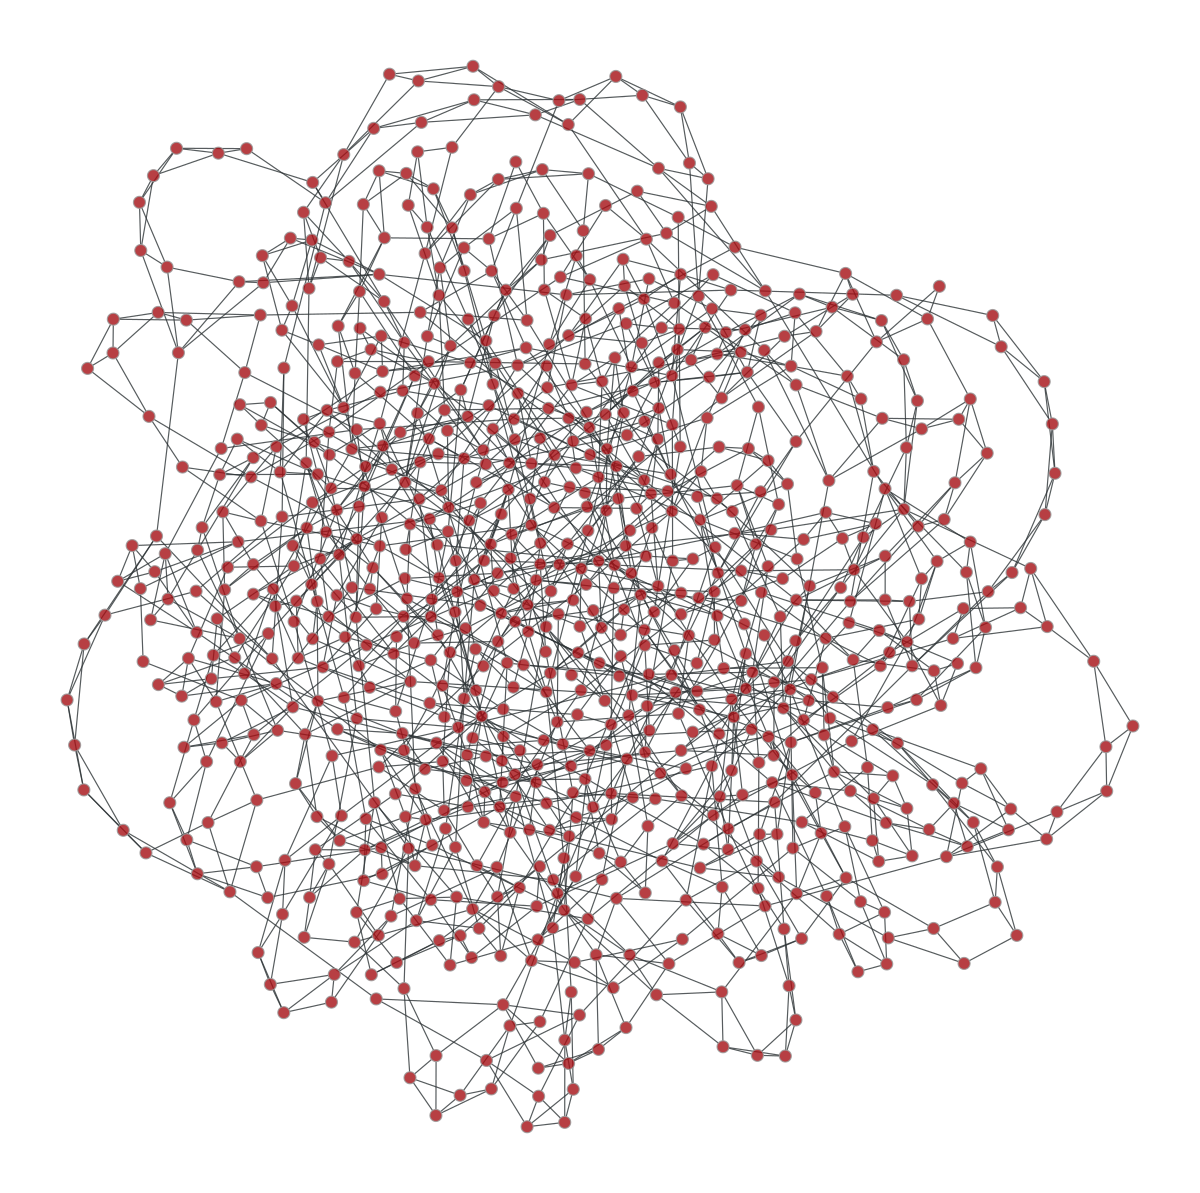

In [5]:
# load graph
G = gt.load_graph(os.path.join(CWD, 'knw_exc.gml'))
# basic viz
gt.graph_draw(G)
plt.show()

### Descriptive analysis 


Basic info:
    - Number of nodes: 817
    - Number of edges: 1634
    - Size largest component: <GraphView object, undirected, with 817 vertices and 1634 edges, 1 internal vertex property, edges filtered by (<EdgePropertyMap object with value type 'bool', for Graph 0x7fbe365c3250, at 0x7fbe365d6e50>, False), vertices filtered by (<VertexPropertyMap object with value type 'bool', for Graph 0x7fbe365c3250, at 0x7fbe365d6fa0>, False), at 0x7fbe365c3250>
    - Pseudo diameter: 13.0
    
Degree:
    - Average 4.0
    - Max 7
    - Min 2



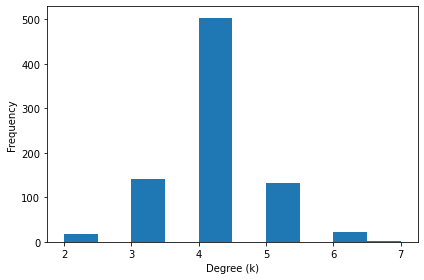

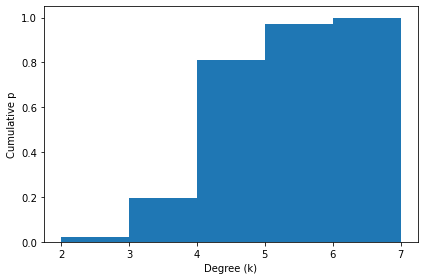

In [6]:
# Degree
degree = [i.out_degree() for i in G.vertices()]

#--+ some info
print("""
Basic info:
    - Number of nodes: {}
    - Number of edges: {}
    - Size largest component: {}
    - Pseudo diameter: {}
    
Degree:
    - Average {}
    - Max {}
    - Min {}
""".format(len(G.get_vertices()), 
           len(G.get_edges()), 
           gt.extract_largest_component(G),
           gt.pseudo_diameter(G)[0],
           np.mean(degree),
           max(degree),
           min(degree))
)

# --+ hist
fig, ax = plt.subplots(tight_layout=True)
ax.hist(degree)
ax.set_xlabel('Degree (k)')
ax.set_ylabel('Frequency')
plt.show()

# --+ hist cumulative
fig, ax = plt.subplots(tight_layout=True)
ax.hist(degree, density=True, cumulative=1)
ax.set_xlabel('Degree (k)')
ax.set_ylabel('Cumulative p')
plt.show()

           degree  betweenness   closeness  eigenvector
count  817.000000   817.000000  817.000000   817.000000
mean     4.000000     0.007865    0.135844     0.030910
std      0.732642     0.006697    0.010843     0.016398
min      2.000000     0.000000    0.104857     0.006618
25%      4.000000     0.002650    0.128544     0.018075
50%      4.000000     0.005830    0.136752     0.027437
75%      4.000000     0.011274    0.142907     0.039310
max      7.000000     0.038652    0.163070     0.095446


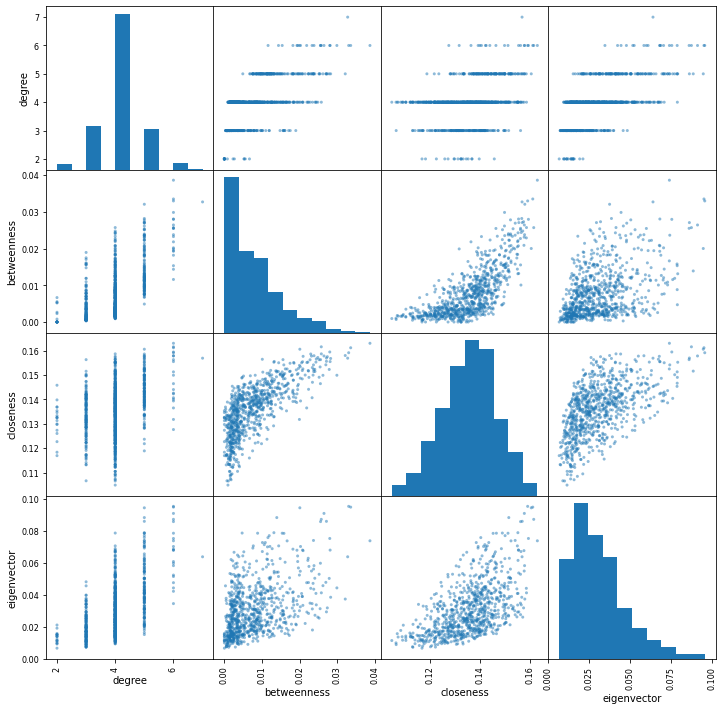

In [7]:
# Centrality
#--+ Betweenness
vp, ep = gt.betweenness(G)
betweenness = [i for i in vp]
#--+ Closeness
c = gt.closeness(G)
#--+ Eigenvector
ee, x = gt.eigenvector(G)
#--+ get dataframe 
d = {
    'degree': degree,
    'betweenness': betweenness,
    'closeness': [i for i in c],
    'eigenvector': [i for i in x]
}
df_c = pd.DataFrame(d)
# --+ print descriptive
print(df_c.describe())
# --+ pairplot
pd.plotting.scatter_matrix(df_c, figsize=(12,12), range_padding=0.15)
plt.show()

### Robustness

In [8]:
# Vertex property
#--+ create
G.vertex_properties["betweenness"] = G.new_vertex_property("double")
#--+ pass values
for i in G.vertices():
    G.vertex_properties["betweenness"][i] = betweenness[int(i)]

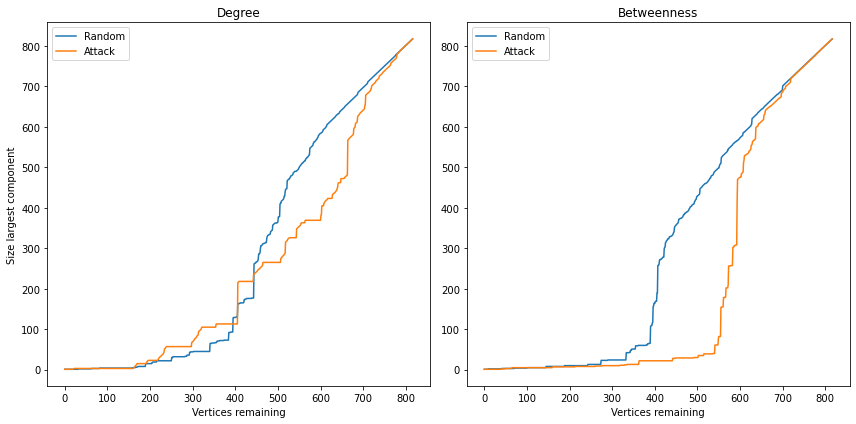

In [9]:
# Betweenness
#--+ Selective node removal
vertices = sorted([v for v in G.vertices()], key=lambda v: G.vertex_properties["betweenness"][v])
bw_sizes, comp = gt.vertex_percolation(G, vertices)
#--+ Random node removal
np.random.shuffle(vertices)
bw_sizes2, comp = gt.vertex_percolation(G, vertices)

# Degree
#--+ Selective node removal
vertices = sorted([v for v in G.vertices()], key=lambda v: v.out_degree())
dg_sizes, comp = gt.vertex_percolation(G, vertices)
#--+ Random node removal
np.random.shuffle(vertices)
dg_sizes2, comp = gt.vertex_percolation(G, vertices)


# Plot
fig = plt.figure(tight_layout=True, figsize=(12, 6))
#--+ add plots
ax_0 = fig.add_subplot(1,2,1) 
ax_1 = fig.add_subplot(1,2,2) 
#--+ Degree
ax_0.plot(dg_sizes2, label="Random")
ax_0.plot(dg_sizes, label="Attack")
ax_0.set_xlabel("Vertices remaining")
ax_0.set_ylabel("Size largest component")
ax_0.set_title('Degree')
ax_0.legend(loc="upper left")
#--+ Betweenness
ax_1.plot(bw_sizes2, label="Random")
ax_1.plot(bw_sizes, label="Attack")
ax_1.set_xlabel("Vertices remaining")
ax_1.set_title('Betweenness')
ax_1.legend(loc="upper left")
#--+ plot
plt.show()

### Draw

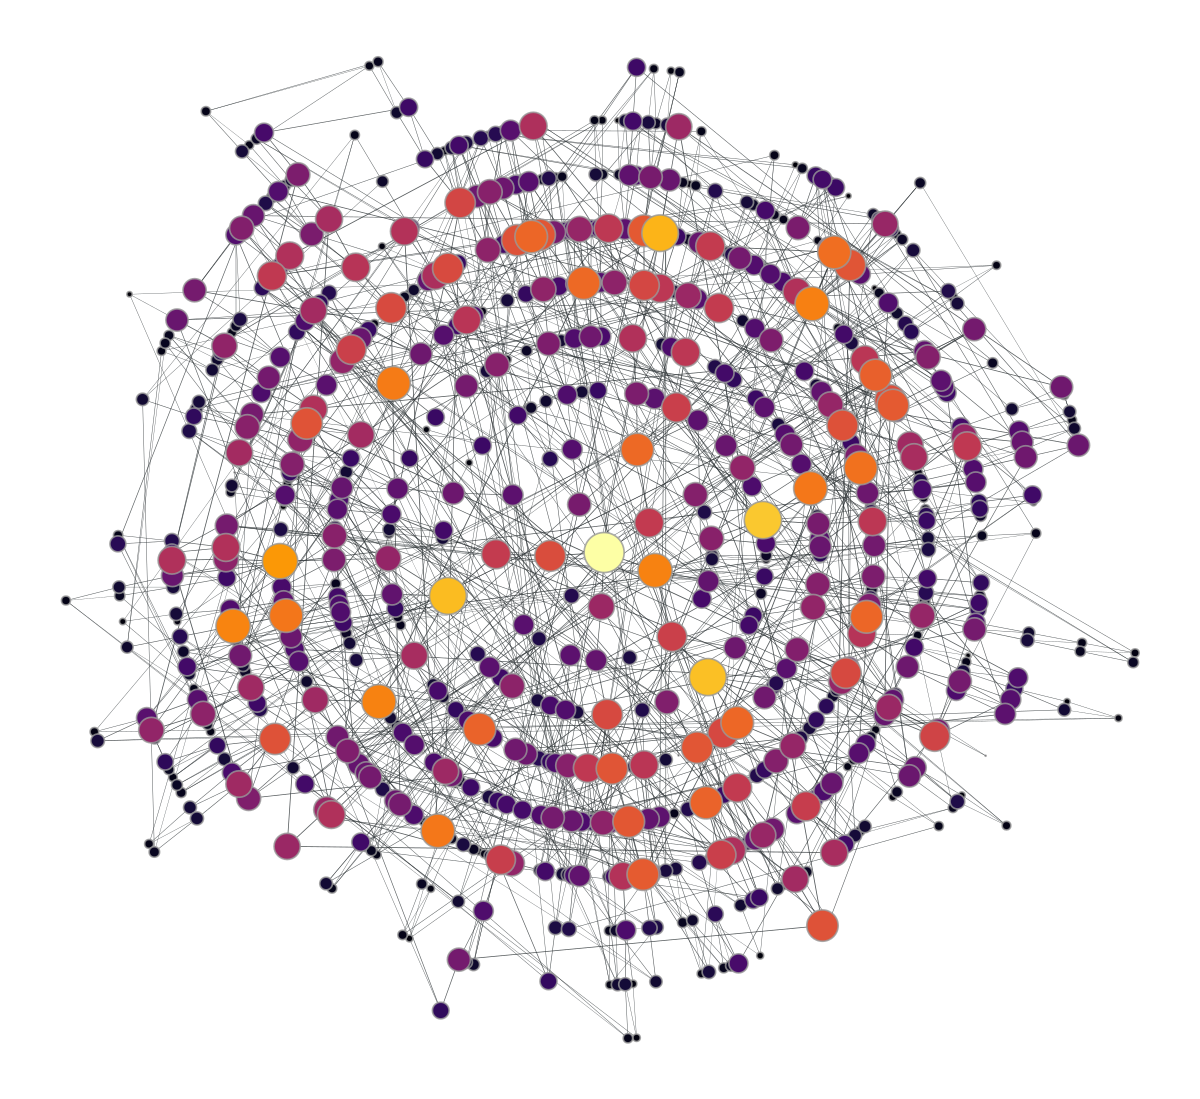

In [10]:
# set positions
node_max_vp =  np.argwhere(np.array(betweenness) == np.array(betweenness).max())[0][0]
pos = gt.radial_tree_layout(G, G.vertex(node_max_vp))
# create graph
gt.graph_draw(G,
              pos=pos,
              vertex_fill_color=vp,
              vertex_size=gt.prop_to_size(vp, mi=0.5, ma=20),
              edge_pen_width=gt.prop_to_size(ep, mi=0.1, ma=0.5),
              vcmap=cm.inferno,
              vorder=vp)
plt.show()

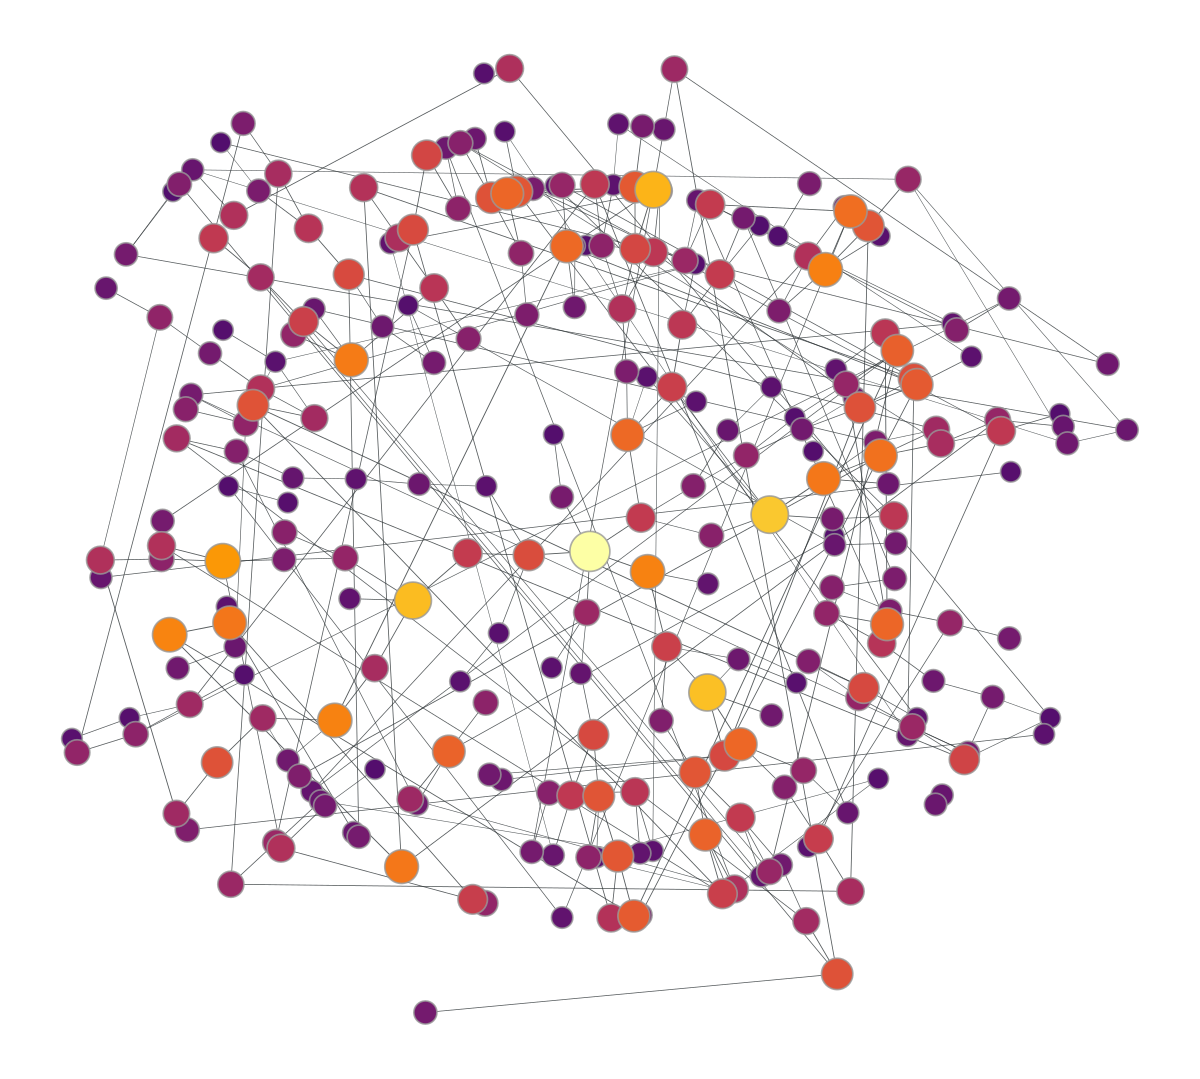

In [11]:
# top 250
vertices = sorted([v for v in G.vertices()], key=lambda v: G.vertex_properties["betweenness"][v])[550:]
#--+ select some vertices
G.vertex_properties["vlift"] = G.new_vertex_property('bool')
for v in vertices:
    G.vertex_properties["vlift"][v] = True
#--+ GraphView    
sub = gt.GraphView(G, G.vertex_properties["vlift"] )
#--+ draw
gt.graph_draw(sub,
              pos=pos,
              vertex_fill_color=vp,
              vertex_size=gt.prop_to_size(vp, mi=0.5, ma=20),
              edge_pen_width=gt.prop_to_size(ep, mi=0.1, ma=0.5),
              vcmap=cm.inferno,
              vorder=vp)
plt.show()

## Human and Social capital

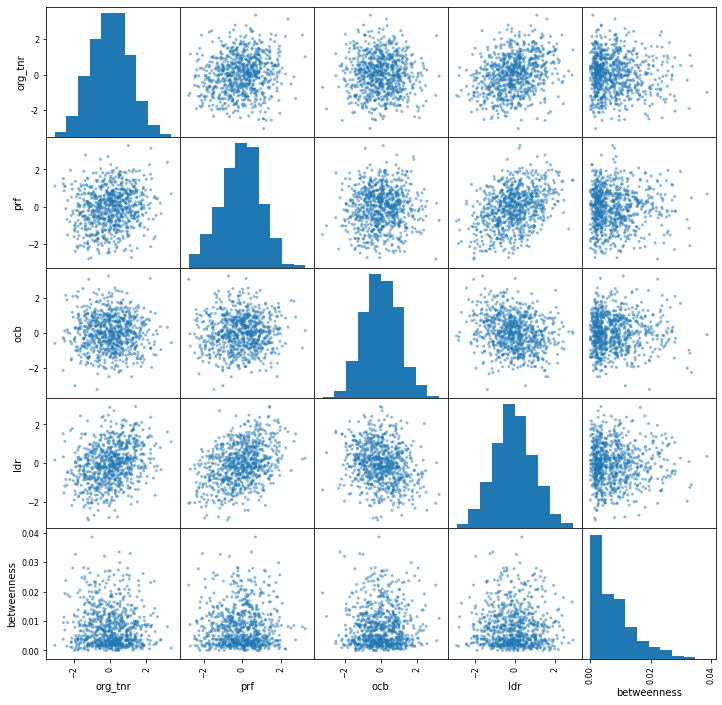

In [12]:
# Merge info
df = pd.concat([df, df_c.betweenness], axis=1)
# --+ pairplot
pd.plotting.scatter_matrix(df.iloc[:, 1:], figsize=(12,12), range_padding=0.15)
plt.show()

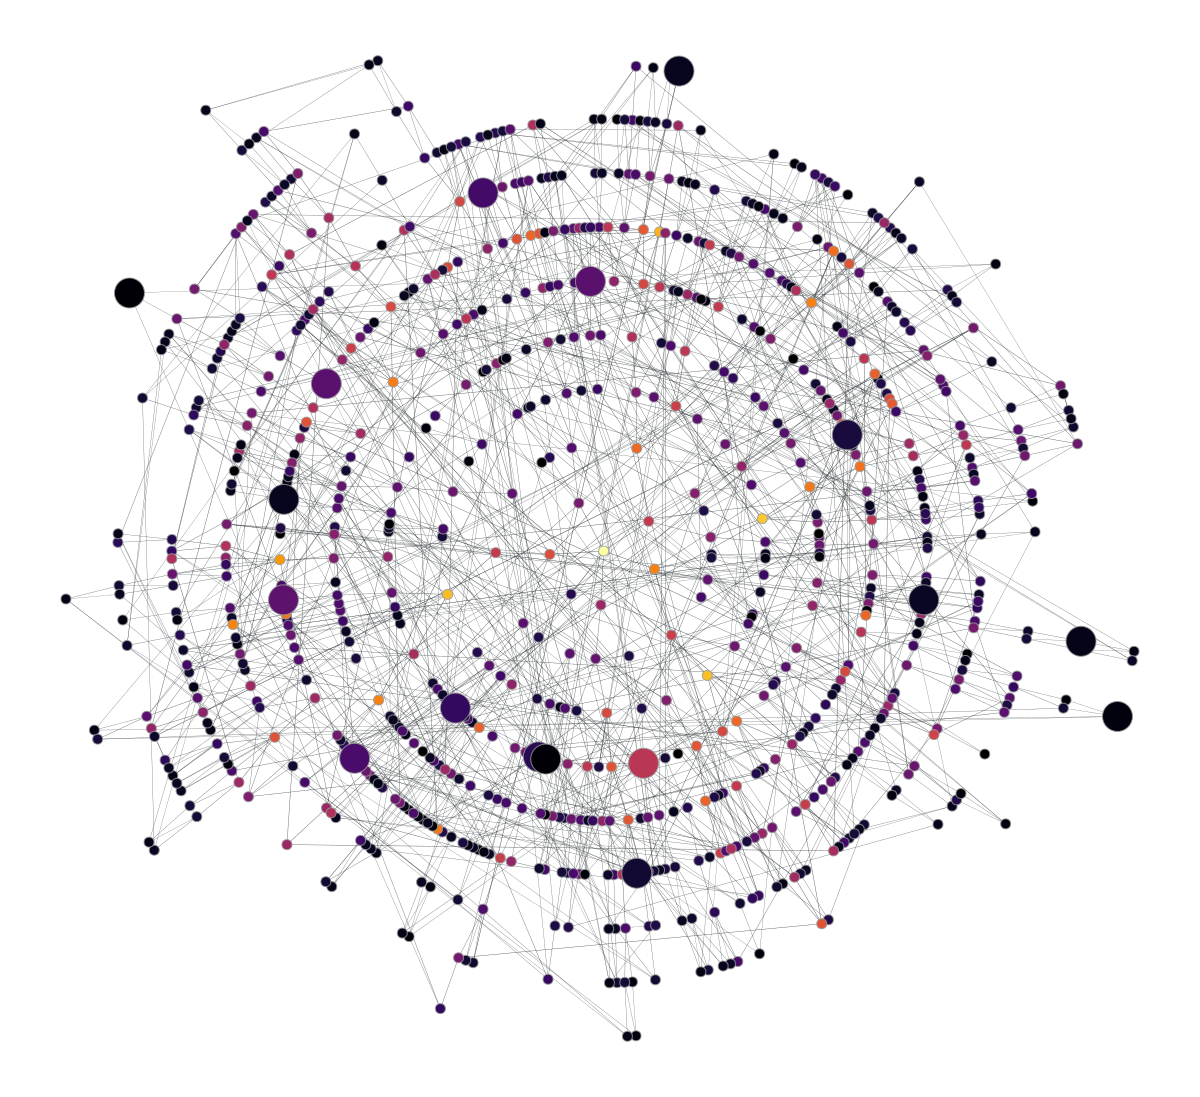

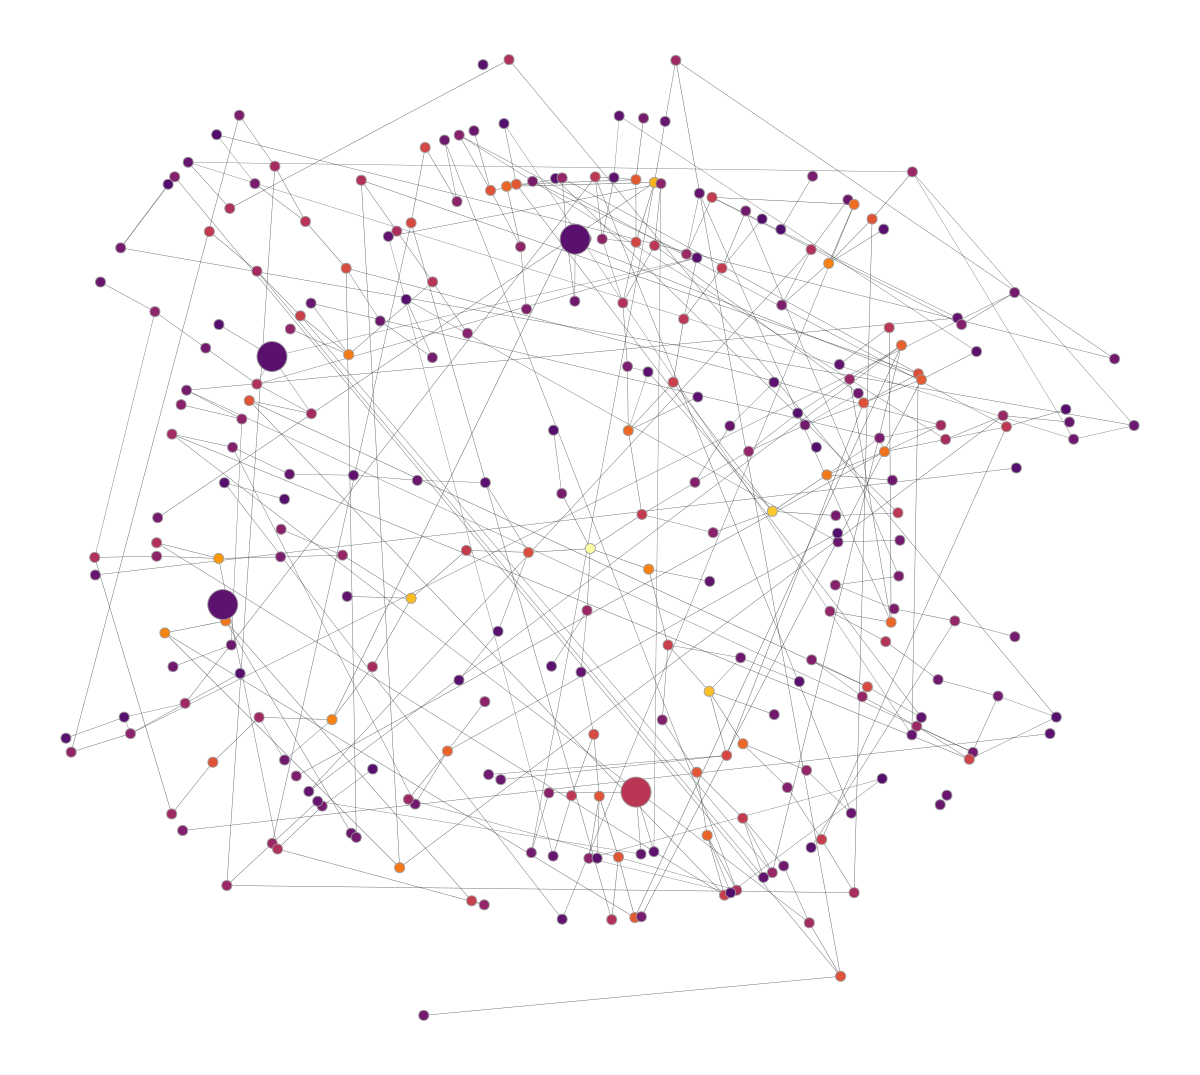

In [13]:
# HR 17 stars
#--+ get vertices
G.vertex_properties["stars"] = G.new_vertex_property('bool')
for v in stars:
    G.vertex_properties["stars"][v] = True
    
#--+ full graph
gt.graph_draw(G,
              pos=pos,
              vertex_fill_color=vp,
              vertex_size=gt.prop_to_size(G.vertex_properties["stars"], mi=5, ma=15),
              edge_pen_width=gt.prop_to_size(ep, mi=0.1, ma=0.25),
              vcmap=cm.inferno,
              vorder=G.vertex_properties["stars"])
plt.show()

#--+ sub-graph
gt.graph_draw(sub,
              pos=pos,
              vertex_fill_color=vp,
              vertex_size=gt.prop_to_size(G.vertex_properties["stars"], mi=5, ma=15),
              edge_pen_width=gt.prop_to_size(ep, mi=0.1, ma=0.25),
              vcmap=cm.inferno,
              vorder=G.vertex_properties["stars"])
plt.show()

In [14]:
# Alternative strategy
#--+ get dummies
columns = ["org_tnr", "prf", "ocb", "ldr", "betweenness"]
for column in columns:
    df["dummy_" + column] = pd.cut(df[column], 2, labels=["low", "high"])
#--+ count 
df['count'] = 1
#--+ pivot
pd.pivot_table(df, values='count', index = df.iloc[:,6:11], aggfunc = np.sum)

count
dummy_org_tnr dummy_prf dummy_ocb dummy_ldr dummy_betweenness       
low           low       low       low       low                   78
                                            high                   8
                                  high      low                   50
                                            high                   7
                        high      low       low                  108
                                            high                   7
                                  high      low                   27
                                            high                   2
              high      low       low       low                   30
                                            high                   2
                                  high      low                   38
                                            high                   4
                        high      low       low                   41
                                            high                   5
                                  high      low                   35
                                            high                   4
high          low       low       low       low                   41
                                            high                   3
                                  high      low                   57
                                            high                   5
                        high      low       low                   54
                                            high                   2
                                  high      low                   39
                                            high                   4
              high      low       low       low                   24
                                            high                   3
                                  high      low                   56
                                            high                   3
                        high      low       low                   24
                                            high                   3
                                  high      low                   50
                                            high                   3

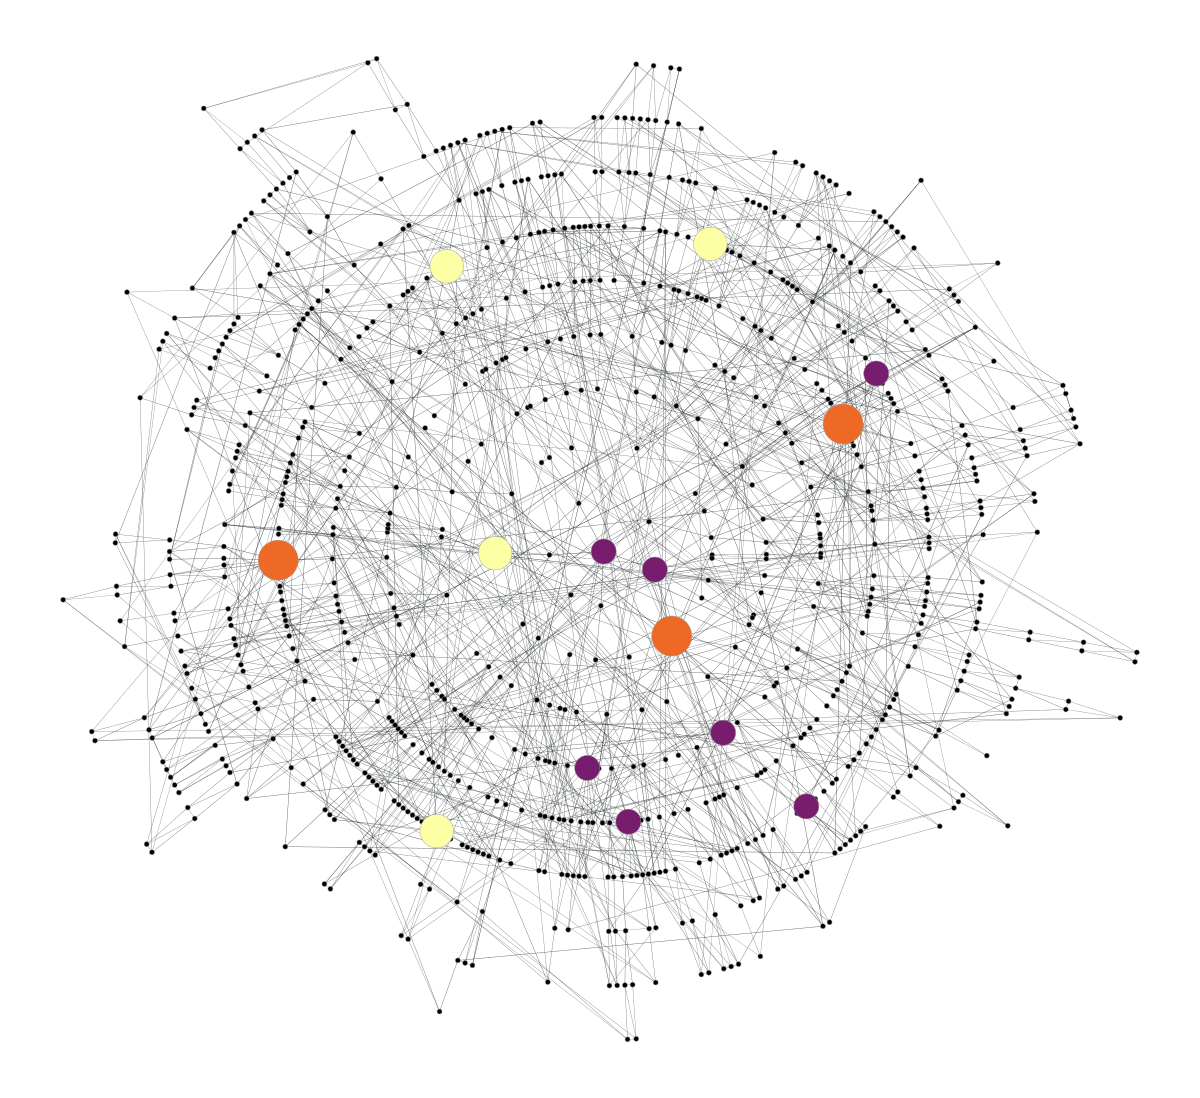

In [15]:
# Who to retain and how?
#--+ high perf
high_perf = df[(df.dummy_prf == 'high') &
   (df.dummy_ocb != 'high') &
   (df.dummy_ldr == 'high') &
   (df.dummy_betweenness == 'high')].index
#--+ new stars
new_stars = df[(df.dummy_org_tnr != 'high') &
   (df.dummy_prf == 'high') &
   (df.dummy_ocb == 'high') &
   (df.dummy_ldr == 'high') &
   (df.dummy_betweenness == 'high')].index
#--+ experts
experts = df[(df.dummy_org_tnr == 'high') &
   (df.dummy_prf == 'high') &
   (df.dummy_ocb == 'high') &
   (df.dummy_ldr == 'high') &
   (df.dummy_betweenness == 'high')].index
#--+ pass info to graph
G.vertex_properties["retain_intensity"] = G.new_vertex_property('int')
for v in high_perf:
    G.vertex_properties["retain_intensity"][v] = 3
for v in new_stars:
    G.vertex_properties["retain_intensity"][v] = 6
for v in experts:
    G.vertex_properties["retain_intensity"][v] = 9
#--+ create graph
gt.graph_draw(G,
              pos=pos,
              vertex_fill_color=G.vertex_properties["retain_intensity"],
              vertex_size=gt.prop_to_size(G.vertex_properties["retain_intensity"], mi=2.5, ma=20),
              edge_pen_width=gt.prop_to_size(ep, mi=0.1, ma=0.25),
              vcmap=cm.inferno,
              vorder=G.vertex_properties["retain_intensity"])
plt.show()

## Who to retain and how?

<h3><center>What would you do?</center></h3>

<center>
<img src="http://i.cdn.turner.com/cnn/2009/SHOWBIZ/Movies/12/04/up.in.air.review/t1larg.jpg">
</center>